In [1]:
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC

# Load multi-class classification dataset
from deepforest import CascadeForestClassifier


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [3]:
# Load the dataset and split into train/test splits

# df = pd.read_csv('479.csv',sep=",") 
# del df['Unnamed: 0']

df=pd.read_csv('UNSW_2018_IoT_Botnet_Final_10_Best.csv',sep=";")  
del df['Unnamed: 0']
df.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


In [4]:
# 'attack','category','subcategory'
ten_best_features = df[['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max','category']]

In [5]:
pd.value_counts(df.category)

DDoS              1926624
DoS               1650260
Reconnaissance      91082
Normal                477
Theft                  79
Name: category, dtype: int64

In [6]:
classes = list(ten_best_features['category'].unique()) 
classes

['DoS', 'DDoS', 'Normal', 'Reconnaissance', 'Theft']

In [7]:
labels = ['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max']

In [8]:
# Load the dataset and split into train/test splits

ten_best_features = ten_best_features.values

y = ten_best_features[:,10]
X = ten_best_features[:,0:10]

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

# ROC AUC

In [9]:
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.model_selection import FeatureImportances

--------------------------------------------
ROCAUC
--------------------------------------------


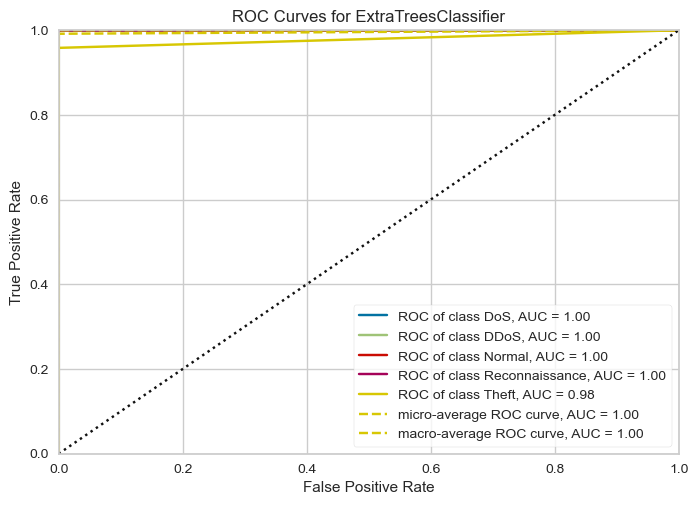

--------------------------------------------
confusion_matrix classification_report
--------------------------------------------
accuracy_score: 0.999960928875106 ExtraTreesClassifier()
[[577968      5      0      1      0]
 [    16 495235      1      0      0]
 [     1      1    136      3      0]
 [     3      4      3  27156      0]
 [     0      1      2      2     19]]


                precision    recall  f1-score   support

          DDoS       1.00      1.00      1.00    577974
           DoS       1.00      1.00      1.00    495252
        Normal       0.96      0.96      0.96       141
Reconnaissance       1.00      1.00      1.00     27166
         Theft       1.00      0.79      0.88        24

      accuracy                           1.00   1100557
     macro avg       0.99      0.95      0.97   1100557
  weighted avg       1.00      1.00      1.00   1100557

--------------------------------------------
recall_curve_viz
--------------------------------------------


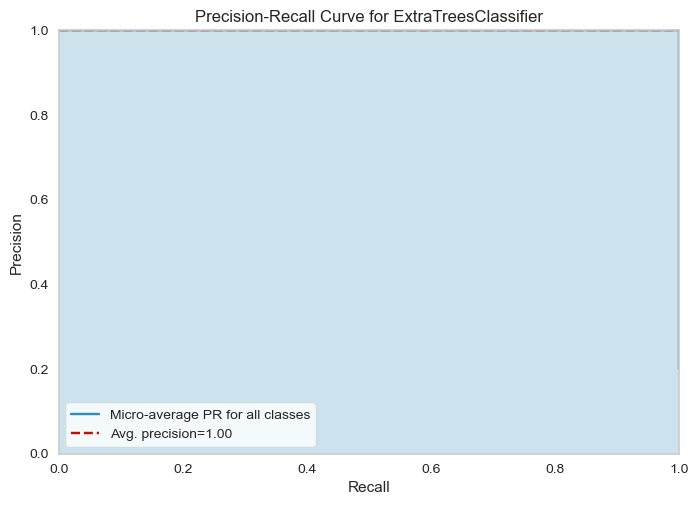

--------------------------------------------
PrecisionRecallCurve
--------------------------------------------


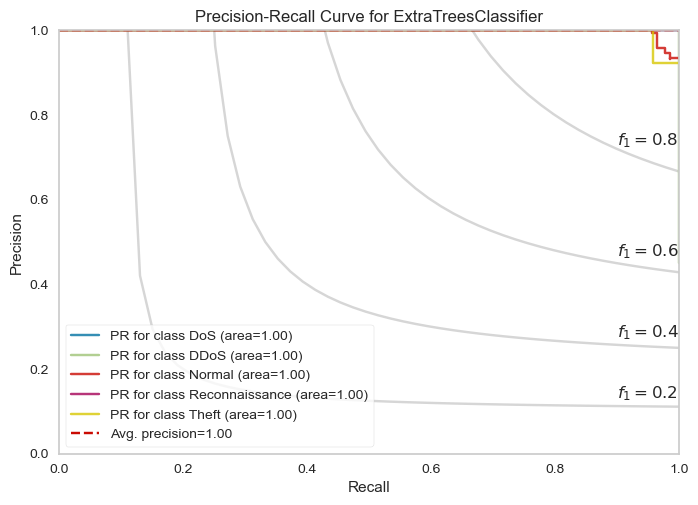

--------------------------------------------
ROCAUC
--------------------------------------------


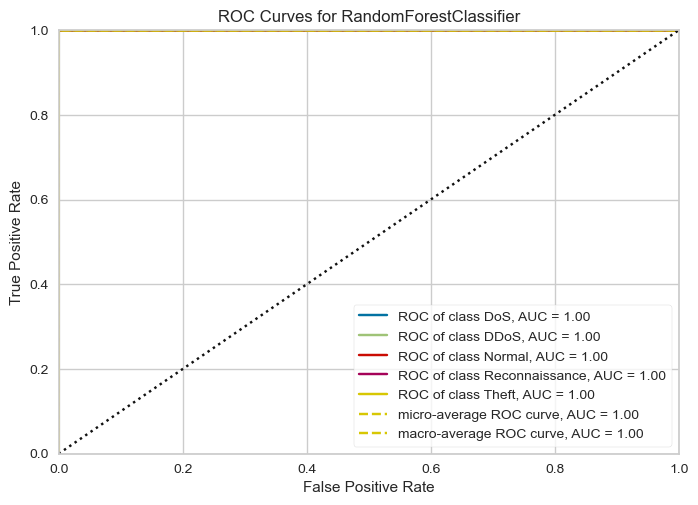

--------------------------------------------
confusion_matrix classification_report
--------------------------------------------
accuracy_score: 0.9999700151832208 RandomForestClassifier()
[[577969      4      0      1      0]
 [    12 495238      2      0      0]
 [     0      2    136      3      0]
 [     0      2      1  27163      0]
 [     0      0      2      4     18]]


                precision    recall  f1-score   support

          DDoS       1.00      1.00      1.00    577974
           DoS       1.00      1.00      1.00    495252
        Normal       0.96      0.96      0.96       141
Reconnaissance       1.00      1.00      1.00     27166
         Theft       1.00      0.75      0.86        24

      accuracy                           1.00   1100557
     macro avg       0.99      0.94      0.96   1100557
  weighted avg       1.00      1.00      1.00   1100557

--------------------------------------------
recall_curve_viz
--------------------------------------------


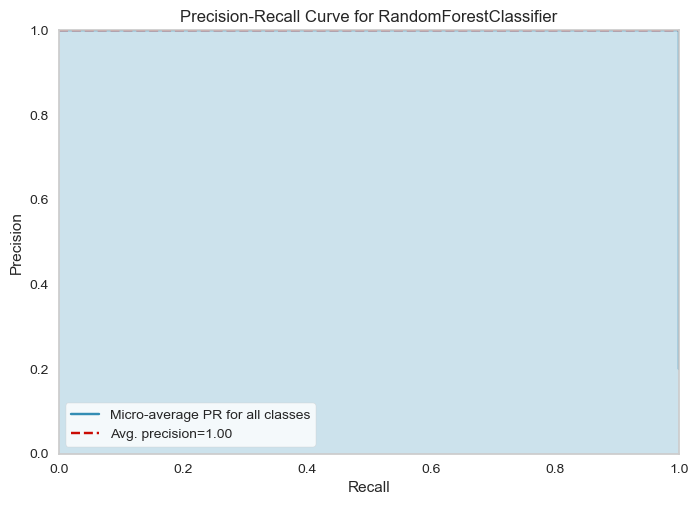

--------------------------------------------
PrecisionRecallCurve
--------------------------------------------


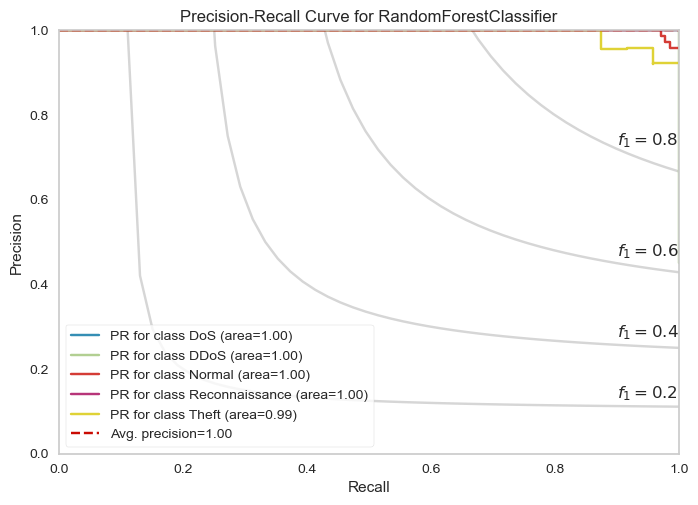

--------------------------------------------
ROCAUC
--------------------------------------------


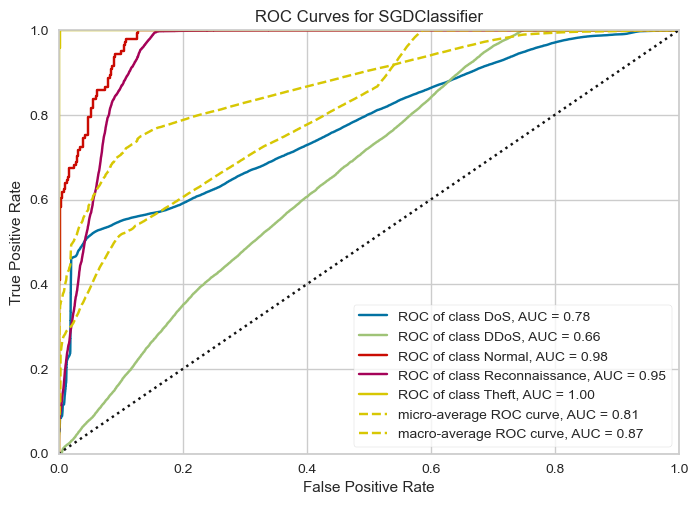

--------------------------------------------
confusion_matrix classification_report
--------------------------------------------
accuracy_score: 0.5273357036482436 SGDClassifier()
[[577085    372      0    517      0]
 [491914   1596      1   1741      0]
 [    46     87      3      5      0]
 [ 22438   2782    267   1679      0]
 [     0     22      0      2      0]]


                precision    recall  f1-score   support

          DDoS       0.53      1.00      0.69    577974
           DoS       0.33      0.00      0.01    495252
        Normal       0.01      0.02      0.01       141
Reconnaissance       0.43      0.06      0.11     27166
         Theft       0.00      0.00      0.00        24

      accuracy                           0.53   1100557
     macro avg       0.26      0.22      0.16   1100557
  weighted avg       0.44      0.53      0.37   1100557

--------------------------------------------
recall_curve_viz
--------------------------------------------


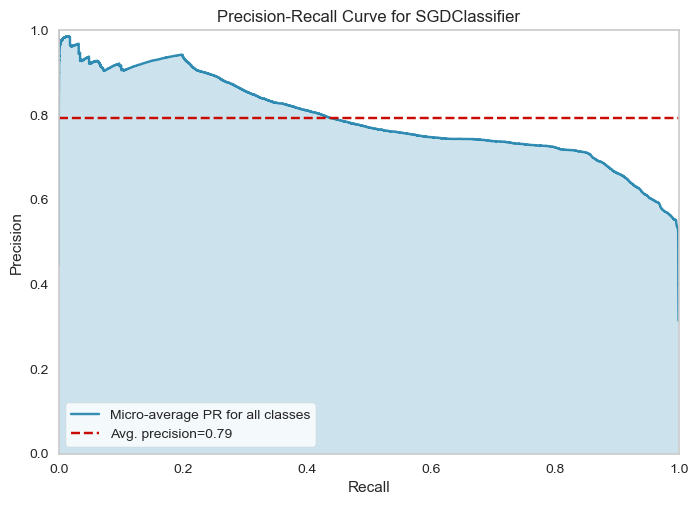

--------------------------------------------
PrecisionRecallCurve
--------------------------------------------


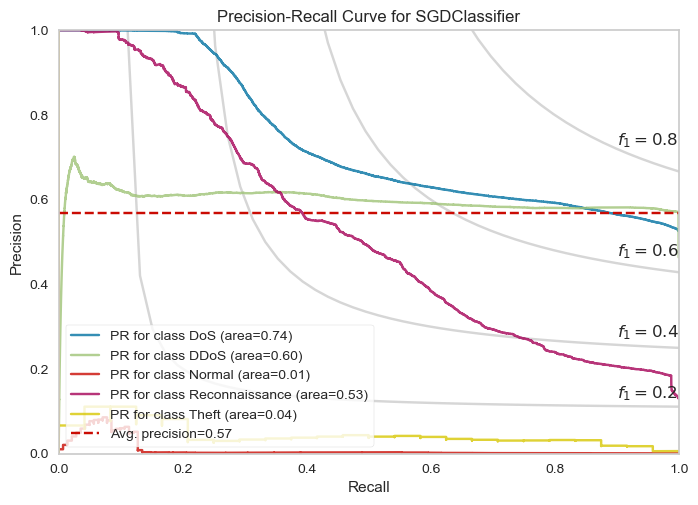

--------------------------------------------
ROCAUC
--------------------------------------------
[2023-01-12 00:01:45.364] Start to fit the model:
[2023-01-12 00:01:45.366] Fitting cascade layer = 0 
[2023-01-12 00:16:55.293] layer = 0  | Val Acc = 99.972 % | Elapsed = 909.928 s
[2023-01-12 00:16:57.421] Fitting cascade layer = 1 
[2023-01-12 00:27:23.315] layer = 1  | Val Acc = 99.971 % | Elapsed = 625.893 s
[2023-01-12 00:27:23.315] Early stopping counter: 1 out of 2
[2023-01-12 00:27:25.633] Fitting cascade layer = 2 
[2023-01-12 00:38:05.343] layer = 2  | Val Acc = 99.970 % | Elapsed = 639.711 s
[2023-01-12 00:38:05.343] Early stopping counter: 2 out of 2
[2023-01-12 00:38:05.343] Handling early stopping
[2023-01-12 00:38:05.375] The optimal number of layers: 1
[2023-01-12 00:38:09.086] Start to evalute the model:
[2023-01-12 00:38:09.540] Evaluating cascade layer = 0 
[2023-01-12 00:39:24.425] Start to evalute the model:
[2023-01-12 00:39:24.849] Evaluating cascade layer = 0 


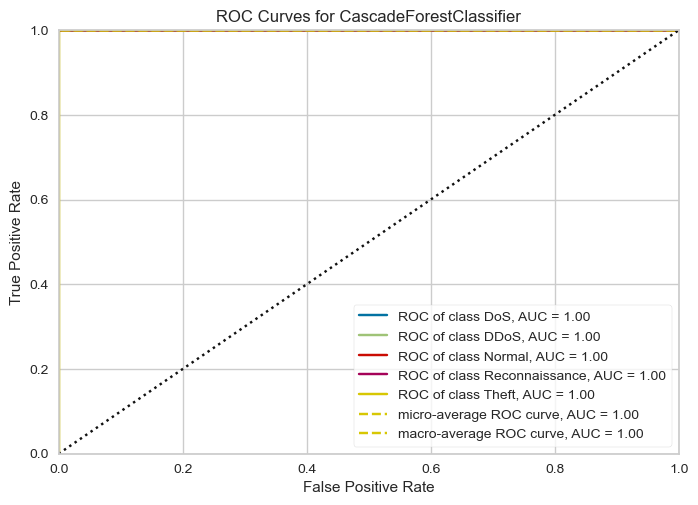

--------------------------------------------
confusion_matrix classification_report
--------------------------------------------
[2023-01-12 00:40:49.170] Start to evalute the model:
[2023-01-12 00:40:49.658] Evaluating cascade layer = 0 
accuracy_score: 0.9997010604630201 CascadeForestClassifier()
[[577734    240      0      0      0]
 [    78 495173      1      0      0]
 [     1      1    137      2      0]
 [     0      0      2  27164      0]
 [     0      0      2      2     20]]


                precision    recall  f1-score   support

          DDoS       1.00      1.00      1.00    577974
           DoS       1.00      1.00      1.00    495252
        Normal       0.96      0.97      0.97       141
Reconnaissance       1.00      1.00      1.00     27166
         Theft       1.00      0.83      0.91        24

      accuracy                           1.00   1100557
     macro avg       0.99      0.96      0.98   1100557
  weighted avg       1.00      1.00      1.00   1100557



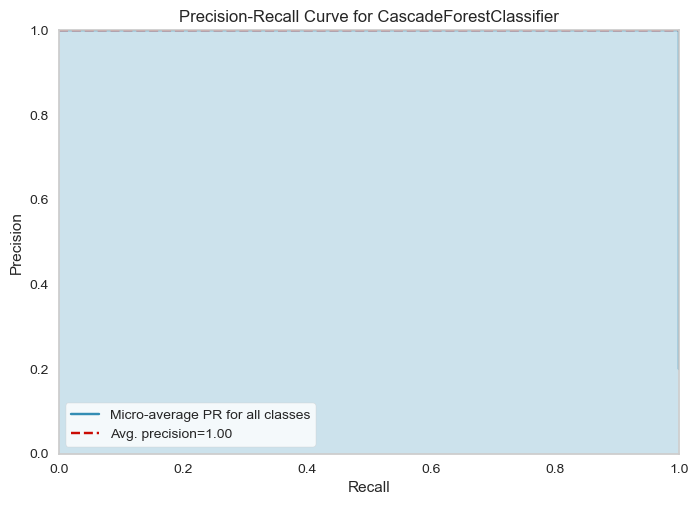

--------------------------------------------
PrecisionRecallCurve
--------------------------------------------
[2023-01-12 12:29:31.688] Start to fit the model:
[2023-01-12 12:29:31.688] Fitting cascade layer = 0 
[2023-01-12 12:43:23.350] layer = 0  | Val Acc = 99.968 % | Elapsed = 831.662 s
[2023-01-12 12:43:24.642] Fitting cascade layer = 1 
[2023-01-12 12:49:09.492] layer = 1  | Val Acc = 99.968 % | Elapsed = 344.850 s
[2023-01-12 12:49:09.492] Early stopping counter: 1 out of 2
[2023-01-12 12:49:10.675] Fitting cascade layer = 2 
[2023-01-12 12:55:54.831] layer = 2  | Val Acc = 99.968 % | Elapsed = 404.156 s
[2023-01-12 12:55:54.831] Early stopping counter: 2 out of 2
[2023-01-12 12:55:54.831] Handling early stopping
[2023-01-12 12:55:54.847] The optimal number of layers: 1
[2023-01-12 12:56:00.207] Start to fit the model:
[2023-01-12 12:56:00.207] Fitting cascade layer = 0 
[2023-01-12 13:10:26.769] layer = 0  | Val Acc = 99.960 % | Elapsed = 866.562 s
[2023-01-12 13:10:28.100] F

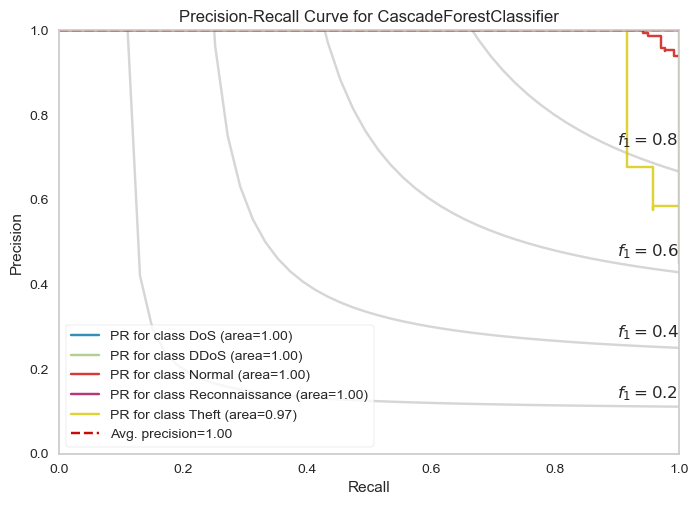

In [10]:
models = [
    ExtraTreesClassifier(n_estimators=100),
    RandomForestClassifier(n_estimators=100),
    SGDClassifier(),
    CascadeForestClassifier() 
]

for model in models:
     
    # Instaniate the classification model and visualizer
    print("--------------------------------------------")
    print("ROCAUC")
    print("--------------------------------------------")
    visualizer = ROCAUC(model, classes=classes)
    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    visualizer.show()                       # Finalize and render the figure
    #visualizer
    
    print("--------------------------------------------")
    print("confusion_matrix classification_report")
    print("--------------------------------------------")
    
    predicted = visualizer.predict(X_test)
    print("accuracy_score:",format(accuracy_score(y_test, predicted)), model)
    print(confusion_matrix(y_test,predicted))
    print('\n')
    print(classification_report(y_test,predicted))
    
    print("--------------------------------------------")
    print("recall_curve_viz")
    print("--------------------------------------------")
    
    # recall_curve_viz : Create the visualizer, fit, score, and show it
    recall_curve_viz = precision_recall_curve(model, X_train, y_train, X_test, y_test)
    recall_curve_viz.show()

    print("--------------------------------------------")
    print("PrecisionRecallCurve")
    print("--------------------------------------------")
    
    # PrecisionRecallCurve : Create the visualizer, fit, score, and show it 
    viz = PrecisionRecallCurve(model,classes=classes,iso_f1_curves=True,per_class=True,micro=False)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()  